In [1]:
pip install -U fortran-magic #Instalación de Fortran 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 8.5 MB/s 


In [2]:
reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [34]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://github.com/ccortesra/AlgorithmsUN2022I/blob/master/Lab2/images/me.jpg?raw=1" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

**My own example 1**


In [4]:
v = [1,2,3,4,5]
v

[1, 2, 3, 4, 5]

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


**My own example 2**

In [7]:
a0=v[1]
b0=v[2]
print("a0",a0,"and", "b0",b0)

a0 2 and b0 3


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


**My own example 3**

In [8]:
last = v[-1]
before_penultimate = v[-3]
print(last, before_penultimate)

5 3


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

**My own example 4**

In [10]:
sub = v[:2]
sub

[1, 2]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

**My own example 6**

In [11]:
fout=v[:4]
fout

[1, 2, 3, 4]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

**My own example 7**

In [12]:
after_one = v[1:]
after_one

[2, 3, 4, 5]

In [14]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

**My own example 8**

In [15]:
l[2:5:3]

['c']

**My own example 9**

In [16]:
l[:7:1]

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


**My own example 10**

In [17]:
x = l
x.append("test")
print(x)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'test']


In [19]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

**My own example 11**

In [20]:
[ x**3 for x in l] 

[1, 8, 27, 64, 125]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

**My own example 12**

In [21]:
test = {"a":"1",
             "b":"2",
             "c":"3",
             "d":"4",
             }
test

{'a': '1', 'b': '2', 'c': '3', 'd': '4'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

**My own example 13**

In [22]:
test["e"]="5" #Agregar elemento al diccionario
test

{'a': '1', 'b': '2', 'c': '3', 'd': '4', 'e': '5'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell'}

**My own example 14**

In [23]:
del test["e"] 
test

{'a': '1', 'b': '2', 'c': '3', 'd': '4'}

**My own example 15**

In [ ]:
del test["a"] 
test

{'a': '1', 'b': '2', 'c': '3', 'd': '4'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://github.com/ccortesra/AlgorithmsUN2022I/blob/master/Lab2/images/pacino.gif?raw=1" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

**My own example 16**

In [24]:
a0=[[1,1,1,1],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1],]

b0=[[3,3,3,3],
    [3,3,3,3],
    [3,3,3,3],]

In [25]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://github.com/ccortesra/AlgorithmsUN2022I/blob/master/Lab2/images/gross.gif?raw=1" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 0 ns, sys: 41 µs, total: 41 µs
Wall time: 46 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 17**

In [26]:
# time cuenta el tiempo de el codigo que ejecutamos
%%time 
matmul(a0,b0)

CPU times: user 44 µs, sys: 5 µs, total: 49 µs
Wall time: 52.7 µs


[[9, 9, 9, 9], [9, 9, 9, 9], [9, 9, 9, 9], [9, 9, 9, 9]]

In [28]:
import random
def random_matrix(m, n): #crea una matriz aleatoria con m filas y n columnas
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.6362218098277146, 0.18417609366002485, 0.3634689409305284],
 [0.4863750466701102, 0.24406243761219604, 0.4418877083629401]]

**My own example 18**

In [ ]:
testM=random_matrix(3,10)
testM

In [30]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.9 s, sys: 59.4 ms, total: 10.9 s
Wall time: 12.8 s


**My own example 19**

In [ ]:
%%time
a0= random_matrix(20,30)
b0= random_matrix(30,40)
matmul(a0,b0)

In [36]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [32]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [38]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [39]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 14.3 ms, sys: 0 ns, total: 14.3 ms
Wall time: 15.4 ms


333328333350000.0

In [40]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 203 µs, sys: 10 µs, total: 213 µs
Wall time: 219 µs


333328333350000.0

**My own example 20**

In [44]:
%%time
python_dot_product(np.arange(10000000),np.arange(10000000))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


CPU times: user 2.67 s, sys: 49.7 ms, total: 2.72 s
Wall time: 2.82 s


1291890006563070912

**My own example 21**

In [45]:
%%time
fortran_dot_product(np.arange(10000000),np.arange(10000000))

CPU times: user 78.1 ms, sys: 56.9 ms, total: 135 ms
Wall time: 146 ms


3.333332833337171e+20

<center><img src="https://github.com/ccortesra/AlgorithmsUN2022I/blob/master/Lab2/images/sloth.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://github.com/ccortesra/AlgorithmsUN2022I/blob/master/Lab2/images/runaway.gif?raw=1" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://github.com/ccortesra/AlgorithmsUN2022I/blob/master/Lab2/images/thisisfine.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

**My own example 22**

In [ ]:
data1= np.array([1,2,3,4,5])
data1

array([10,  9,  8,  7,  6,  5])

**My own example 23**

In [47]:
data1= np.array([[1,2,3,4,5],[1,2,3,4,5]])
data1

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 635 µs, sys: 1.02 ms, total: 1.66 ms
Wall time: 1.03 ms


333328333350000.0

**My own example 24**

In [48]:
%%time
(data1*data1).sum()

CPU times: user 156 µs, sys: 11 µs, total: 167 µs
Wall time: 175 µs


110

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 2.1 ms, sys: 0 ns, total: 2.1 ms
Wall time: 1.08 ms


333328333350000.0

**My own example 25**

In [ ]:
%%time
data1.dot(data1) # con Python

CPU times: user 572 µs, sys: 995 µs, total: 1.57 ms
Wall time: 1.58 ms


355

In [49]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 244 µs, sys: 0 ns, total: 244 µs
Wall time: 252 µs


333328333350000.0

**My own example 26**

In [52]:
%%time
fortran_dot_product(data1,data1)

CPU times: user 1.91 ms, sys: 0 ns, total: 1.91 ms
Wall time: 2.28 ms


110.0

**My own example 27**

In [53]:
%%time
fortran_dot_product(np.arange(5000000),np.arange(5000000))

CPU times: user 48 ms, sys: 2.88 ms, total: 50.9 ms
Wall time: 52.6 ms


4.16666541667329e+19

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

**My own example 28**

In [54]:
data1.append(5) # Debe dar error

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

**My own example 29**

In [58]:
data2 = np.arange(1,21)
data3=data2.reshape(4,5) 
data3

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


**My own example 30**

In [63]:
myArray= np.array([1,2,3,4,5,6,7,8,9], dtype="int").reshape(3,3)
print("Array:\n", myArray, sep='')
print("===========")
print("DType:", myArray.dtype)
print("Shape:", myArray.shape)
print("Strides:", myArray.strides)
print("Data:", myArray.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
DType: int64
Shape: (3, 3)
Strides: (24, 8)
Data: b'\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\t\x00\x00\x00\x00\x00\x00\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

**My own example 31**

In [ ]:
test= np.arange(40).reshape(20,2) 
test

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

**My own example 32**

In [65]:
test= np.arange(60).reshape(6,10) 
test

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

**My own example 33**

In [66]:
test*test

array([[   0,    1,    4,    9,   16,   25,   36,   49,   64,   81],
       [ 100,  121,  144,  169,  196,  225,  256,  289,  324,  361],
       [ 400,  441,  484,  529,  576,  625,  676,  729,  784,  841],
       [ 900,  961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521],
       [1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401],
       [2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

**My own example 34**

In [ ]:
np.sqrt(test)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894],
       [4.47213595, 4.58257569, 4.69041576, 4.79583152, 4.89897949],
       [5.        , 5.09901951, 5.19615242, 5.29150262, 5.38516481]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

**My own example 35**

In [67]:
(test % 10)== 0

array([[ True, False, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

**My own example 36**

In [68]:
((test % 2)!=0) | ((test % 9)==0)

array([[ True,  True, False,  True, False,  True, False,  True, False,
         True],
       [False,  True, False,  True, False,  True, False,  True,  True,
         True],
       [False,  True, False,  True, False,  True, False,  True, False,
         True],
       [False,  True, False,  True, False,  True,  True,  True, False,
         True],
       [False,  True, False,  True, False,  True, False,  True, False,
         True],
       [False,  True, False,  True,  True,  True, False,  True, False,
         True]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

**My own example 37**

In [69]:
test @ test.T

array([[  285,   735,  1185,  1635,  2085,  2535],
       [  735,  2185,  3635,  5085,  6535,  7985],
       [ 1185,  3635,  6085,  8535, 10985, 13435],
       [ 1635,  5085,  8535, 11985, 15435, 18885],
       [ 2085,  6535, 10985, 15435, 19885, 24335],
       [ 2535,  7985, 13435, 18885, 24335, 29785]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [71]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

**My own example 38**

In [ ]:
sines[1]

-0.8649616828896999

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

**My own example 39**

In [ ]:
cosines[2:6]

array([-0.99999873, -0.94029639, -0.76729423, -0.50183791])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

**My own example 40**

In [ ]:
sines[1:] 

array([-0.34035671, -0.64129523, -0.86496168, -0.98440567, -0.98523494,
       -0.86734956, -0.644954  , -0.34484551, -0.0031853 ])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

**My own example 41**

In [ ]:
sines[::-1] # Elementos con paso de 3

array([ 0.00159265, -0.86496168, -0.86734956, -0.0031853 ])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

**My own example 42**

In [ ]:
print(sines, "\n")
sines[[0,1,3]]

[ 0.00159265 -0.34035671 -0.64129523 -0.86496168 -0.98440567 -0.98523494
 -0.86734956 -0.644954   -0.34484551 -0.0031853 ] 



array([ 0.00159265, -0.64129523, -0.98440567])

**My own example 43**

In [ ]:
print(sines, "\n")
sines[[1,5,4]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

**My own example 44**

In [73]:
unsorted = np.array([5,4,3,2,1])

In [74]:
sortedRes = np.argsort(unsorted)
sortedRes

array([4, 3, 2, 1, 0])

**My own example 45**

In [76]:
sortedData= np.argsort(np.array([3,2,1]))
sortedData

array([2, 1, 0])

**My own example 46**

In [78]:
unsorted[sortedData]

array([3, 4, 5])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

**My own example 47**

In [81]:
market_caps2 = np.array([22,36, 15, 21, 7])  # Presumably in dollars?
assets2 = np.array(['A', 'B', 'C', 'D', 'E'])

**My own example 48**

In [84]:
market_caps2=np.argsort(assets2)
assets2[market_caps2]

array(['A', 'B', 'C', 'D', 'E'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

**My own example 49**

In [85]:
test= np.arange(100).reshape(10,10)
test

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

**My own example 50**

In [ ]:
test[:2,:5] 

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

**My own example 51**

In [88]:
test[:2, [0, 2]] 

array([[ 0,  2],
       [10, 12]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

**My own example 52**

In [89]:
test[(test[:,1]%4)==0] 

array([], shape=(0, 10), dtype=int64)

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0326110818195522

**My own example 53**

In [ ]:
variance(np.random.standard_normal(20000))

1.0027353987482972

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean() 

14.5

**My own example 54**

In [ ]:
datos= np.arange(40)
datos.mean()

19.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

**My own example 55**

In [ ]:
datos= np.arange(40).reshape(4,10)
datos

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])

In [ ]:
data.mean()

14.5

**My own example 56**

In [ ]:
datos.mean()

19.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

**My own example 58**

In [93]:
datos.mean(axis=0)

array([1., 2., 3., 4., 5.])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://github.com/ccortesra/AlgorithmsUN2022I/blob/master/Lab2/images/broadcasting.png?raw=1" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://github.com/ccortesra/AlgorithmsUN2022I/blob/master/Lab2/images/unicorn.jpg?raw=1" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://github.com/ccortesra/AlgorithmsUN2022I/blob/master/Lab2/images/panda-wrangling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://github.com/ccortesra/AlgorithmsUN2022I/blob/master/Lab2/images/pandas_logo.png?raw=1" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
from google.colab import files
uploaded = files.upload()
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

Saving AAPL.csv to AAPL (1).csv


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2012-02-01'):pd.Timestamp('2015-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2012-02-01,65.169998,67511500.0
2012-02-02,65.017143,46699100.0
2012-02-03,65.668571,71649900.0
2012-02-06,66.281425,62353200.0
2012-02-07,66.975716,79055900.0
...,...,...
2015-01-29,118.900002,84436400.0
2015-01-30,117.160004,83745500.0
2015-02-02,118.629997,62739100.0


# Rolling Operations

<center><img src="https://github.com/ccortesra/AlgorithmsUN2022I/blob/master/Lab2/images/rolling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

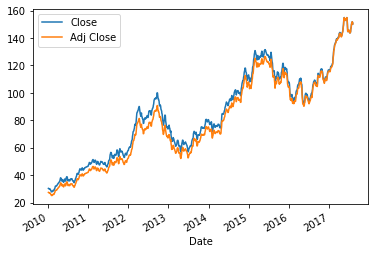

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

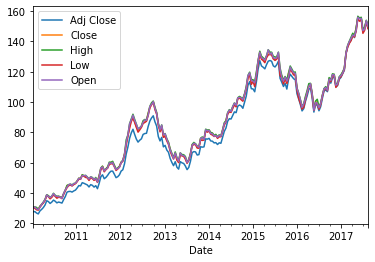

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

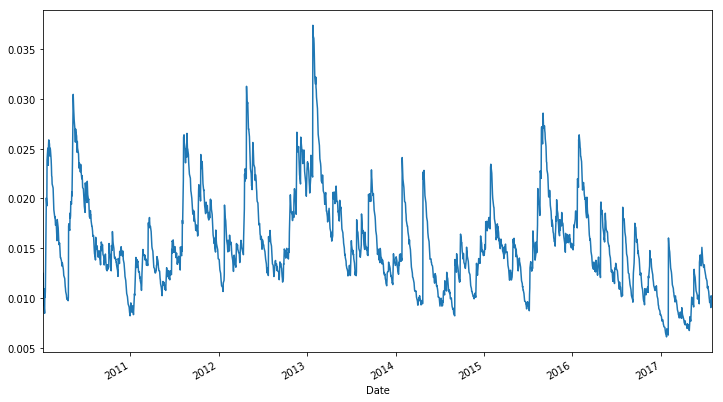

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
!pip install matplotlib-venn
!pip install demos.avocados

In [ ]:
from avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

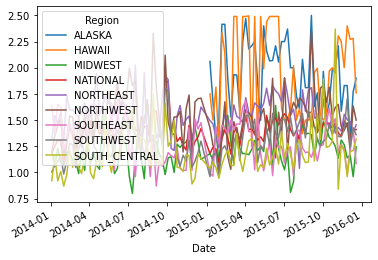

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

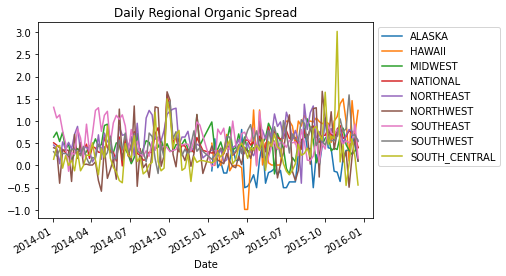

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


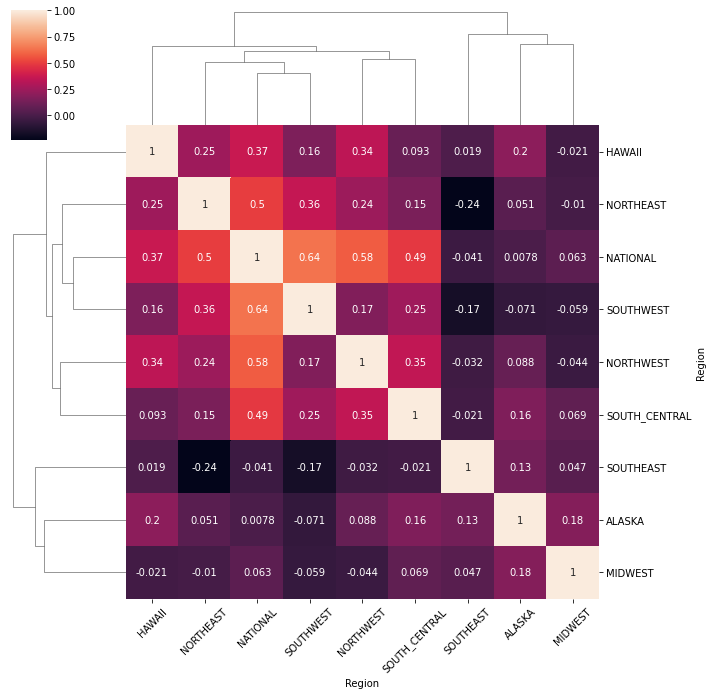

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# **Datos COVID Bogotá**

Analisis de datos de covid en Bogotá D.C hasta el día 5 de abril del 2022. Los datos son descargados de https://datosabiertos.bogota.gov.co/dataset/numero-de-casos-confirmados-por-el-laboratorio-de-covid-19-bogota-d-c. Nota: Asegurarse de ponerlos en el directorio correcto.

En mi caso se descargo en archivo osb_enftransm-covid-19_22022022.csv, pero logicamente la alcaldia los renueva a diario, entonces se descarga el que este en ese momento y se verifica que el directorio y nombre esten bien.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px
import scipy.stats as ss

In [ ]:
df = pd.read_csv('/content/sample_data/osb_enftransm-covid-19_04042022.csv', encoding = 'utf-8',  sep=';')

In [ ]:
df.head()

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Engativá,22,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado


In [ ]:
df.columns

Index(['CASO', 'FECHA_DE_INICIO_DE_SINTOMAS', 'FECHA_DIAGNOSTICO', 'CIUDAD',
       'LOCALIDAD_ASIS', 'EDAD', 'UNI_MED', 'SEXO',
       'FUENTE_O_TIPO_DE_CONTAGIO', 'UBICACION', 'ESTADO'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766607 entries, 0 to 1766606
Data columns (total 11 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   CASO                         int64 
 1   FECHA_DE_INICIO_DE_SINTOMAS  object
 2   FECHA_DIAGNOSTICO            object
 3   CIUDAD                       object
 4   LOCALIDAD_ASIS               object
 5   EDAD                         int64 
 6   UNI_MED                      int64 
 7   SEXO                         object
 8   FUENTE_O_TIPO_DE_CONTAGIO    object
 9   UBICACION                    object
 10  ESTADO                       object
dtypes: int64(3), object(8)
memory usage: 148.3+ MB


In [ ]:
# Quitamos donde hayan variables vacias
vars = ['CASO', 'FECHA_DIAGNOSTICO', 'LOCALIDAD_ASIS', 'EDAD', 'UNI_MED',
       'SEXO', 'FUENTE_O_TIPO_DE_CONTAGIO', 'UBICACION', 'ESTADO']

for i in vars:
  df = df[df[i].notna()]

In [ ]:
df['CASO'] = df['CASO'].apply(lambda x: int(x))

In [ ]:
# Miramos que columnas tienen valores perdidos
df.isna().sum(axis=0)/len(df)

CASO                           0.00000
FECHA_DE_INICIO_DE_SINTOMAS    0.27394
FECHA_DIAGNOSTICO              0.00000
CIUDAD                         0.00000
LOCALIDAD_ASIS                 0.00000
EDAD                           0.00000
UNI_MED                        0.00000
SEXO                           0.00000
FUENTE_O_TIPO_DE_CONTAGIO      0.00000
UBICACION                      0.00000
ESTADO                         0.00000
dtype: float64

In [ ]:
df.isnull().sum(axis=0)/len(df)

CASO                           0.00000
FECHA_DE_INICIO_DE_SINTOMAS    0.27394
FECHA_DIAGNOSTICO              0.00000
CIUDAD                         0.00000
LOCALIDAD_ASIS                 0.00000
EDAD                           0.00000
UNI_MED                        0.00000
SEXO                           0.00000
FUENTE_O_TIPO_DE_CONTAGIO      0.00000
UBICACION                      0.00000
ESTADO                         0.00000
dtype: float64

In [ ]:
# FECHA DE INICIO DE SINTOMAS TIENE UN RATING DE MUCHOS VALORES PERDIDOS
df = df.drop(['FECHA_DE_INICIO_DE_SINTOMAS'], axis = 1) 
df = df.drop(['CIUDAD'], axis = 1) 

In [ ]:
df['FECHA_DIAGNOSTICO']=df['FECHA_DIAGNOSTICO'].apply(lambda x: pd.to_datetime(x,errors='coerce')) # Takes 2-3 mins

**VARIABLES CATEGORICAS DESCRIPCIÓN**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


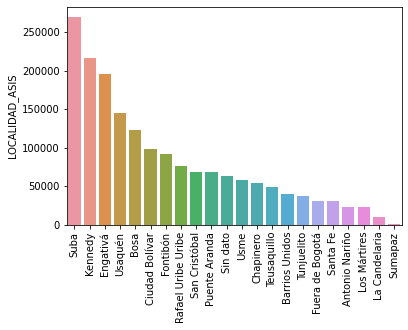

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


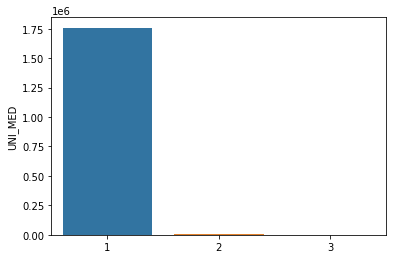

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


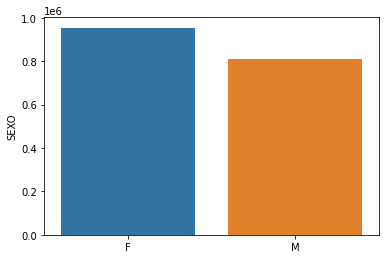

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


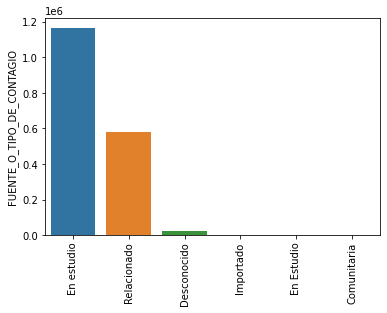

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


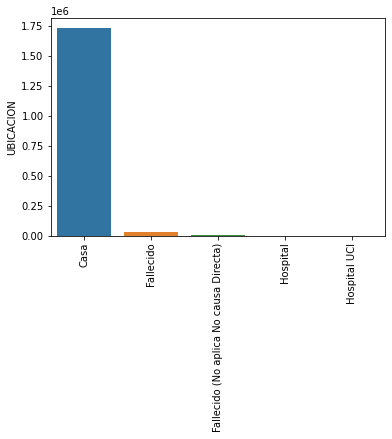

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


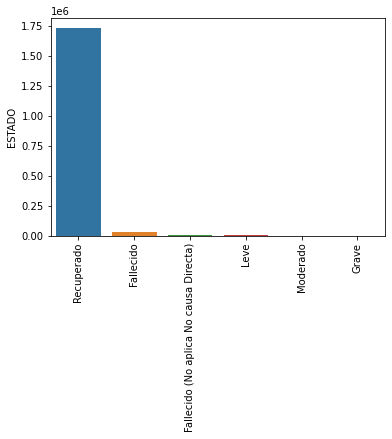

In [ ]:
df_cat = df[['LOCALIDAD_ASIS', 'UNI_MED', 'SEXO', 'FUENTE_O_TIPO_DE_CONTAGIO', 'UBICACION', 'ESTADO']]
for i in df_cat.columns:
    ax = sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts())
    if len(df_cat[i].value_counts().index) >= 5:
      ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show(ax)\

(array([1.13670e+05, 3.53487e+05, 5.20334e+05, 3.73602e+05, 2.62624e+05,
        1.03471e+05, 3.55510e+04, 3.83400e+03, 3.00000e+01, 4.00000e+00]),
 array([  1. ,  13.9,  26.8,  39.7,  52.6,  65.5,  78.4,  91.3, 104.2,
        117.1, 130. ]),
 <a list of 10 Patch objects>)

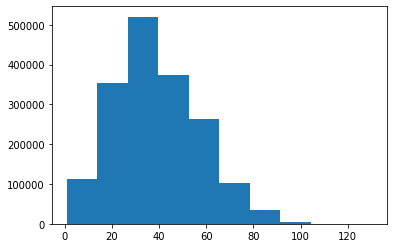

In [ ]:
plt.hist(df['EDAD'])

In [ ]:
# Quiero ver la evolucion de los datos a traves del tiempo  
dfNewCases = df[['CASO']].groupby(df['FECHA_DIAGNOSTICO'],axis=0).count()
dfNewCases

,CASO
FECHA_DIAGNOSTICO,
2020-03-06,1
2020-03-10,2
2020-03-12,2
2020-03-13,6
2020-03-14,4
...,...
2022-03-30,162
2022-03-31,129
2022-04-01,151


In [ ]:
dfNewCases.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2020-03-06 to 2022-04-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CASO    755 non-null    int64
dtypes: int64(1)
memory usage: 11.8 KB


In [ ]:
# Fun Fact If You put it this way it turns into a series data structure (The only change is the parenthesis in 'CASO')
SeriesNewCases = df['CASO'].groupby(df['FECHA_DIAGNOSTICO'],axis=0).count()
SeriesNewCases

FECHA_DIAGNOSTICO
2020-03-06      1
2020-03-10      2
2020-03-12      2
2020-03-13      6
2020-03-14      4
             ... 
2022-03-30    162
2022-03-31    129
2022-04-01    151
2022-04-02    101
2022-04-03      4
Name: CASO, Length: 755, dtype: int64

**Grafica de casos activos**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


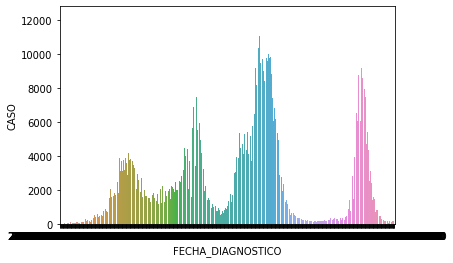

In [ ]:
sns.barplot(dfNewCases.index,dfNewCases['CASO'])

**Porcentaje de infectados entre hombres y mujeres**

In [ ]:
total = df['SEXO'].value_counts()['M'] + df['SEXO'].value_counts()['F']
total  
RatioF = df['SEXO'].value_counts()['F']
RatioM = df['SEXO'].value_counts()['M']

In [ ]:
print('Porcentaje de Mujeres infectadas {}%'.format(RatioF/total * 100))
print('Porcentaje de Hombres infectadas {}%'.format(RatioM/total * 100))

Porcentaje de Mujeres infectadas 54.03618348619699%
Porcentaje de Hombres infectadas 45.96381651380301%


([<matplotlib.patches.Wedge at 0x7fe1d146ca50>,
 [Text(-0.1391069739444327, 1.0911687540431239, 'Femenino'),
  Text(0.13910697394443233, -1.0911687540431239, 'Masculino')],
 [Text(-0.07587653124241783, 0.5951829567507947, '54.0%'),
  Text(0.07587653124241762, -0.5951829567507947, '46.0%')])

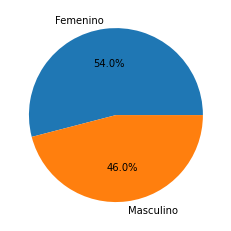

In [ ]:
labels = 'Femenino', 'Masculino'
plt.pie(df_cat['SEXO'].value_counts(), labels=labels, autopct='%1.1f%%')

In [ ]:
new_mask = df['ESTADO'] == 'Fallecido'
new_mask

0          False
1          False
2          False
3          False
4          False
           ...  
1766602    False
1766603    False
1766604    False
1766605    False
1766606    False
Name: ESTADO, Length: 1766607, dtype: bool

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!